Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB
None

First 5 Rows:
         Date   Product Region Customer_Type  Quantity   Price  Discount  \
0  2024-09-20     Paper   West    Individual        56  162.63      0.17   
1  2024-04-21      Pens  North      Business         2   53.46      0.05   
2  2024-12-20      Pens   West    Individual        16   99.10      0.26   
3  2024-08-15  Printers   East      Business      

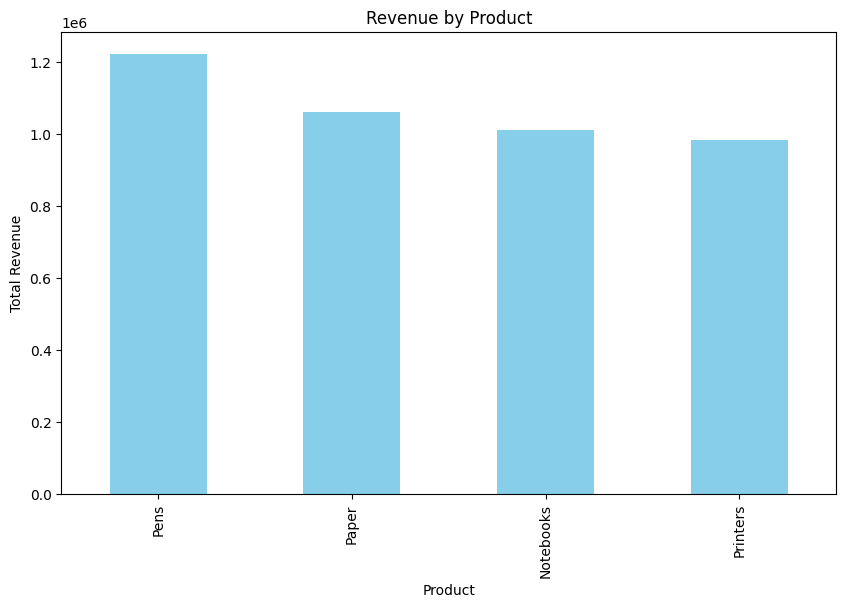

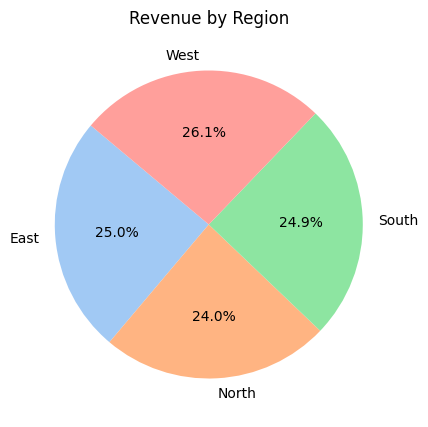


Conclusions:
1. Product sales with the highest revenue can be identified.
2. Regions contributing most to sales can be visualized.
3. Any further analysis on customer type or discount impact can refine insights.


In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Data
file_path = '/kaggle/input/office-supplies-sales/dataset_21_Office Supplies Sales.csv'
data = pd.read_csv(file_path)

#Explore the Data
print("Dataset Overview:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())
print("\nStatistical Summary:")
print(data.describe())
#Clean the DataA

print("\nMissing Values:")
print(data.isnull().sum())


duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()


data['Date'] = pd.to_datetime(data['Date'])

#Analyze the Data

revenue_by_product = data.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print("\nRevenue by Product:")
print(revenue_by_product)


revenue_by_region = data.groupby('Region')['Revenue'].sum()
print("\nRevenue by Region:")
print(revenue_by_region)

# Visualize the Data
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()


plt.figure(figsize=(8, 5))
revenue_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Revenue by Region')
plt.ylabel('')
plt.show()

#Draw Conclusions
print("\nConclusions:")
print("1. Product sales with the highest revenue can be identified.")
print("2. Regions contributing most to sales can be visualized.")
print("3. Any further analysis on customer type or discount impact can refine insights.")
